In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn
from torch.utils.data import Dataset, DataLoader
import cv2
import os

In [2]:
paths = os.listdir('/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images')
paths.sort()
print(paths)

paths_label = os.listdir('/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/labels')
paths_label.sort()
print(paths_label)

['image101.png', 'image105.png', 'image108.png', 'image109.png', 'image110.png', 'image12.png', 'image13.png', 'image14.png', 'image16.png', 'image19.png', 'image250.png', 'image251.png', 'image252.png', 'image253.png', 'image254.png', 'image255.png', 'image256.png', 'image257.png', 'image258.png', 'image259.png', 'image261.png', 'image262.png', 'image263.png', 'image264.png', 'image265.png', 'image267.png', 'image268.png', 'image269.png', 'image27.png', 'image270.png', 'image271.png', 'image272.png', 'image273.png', 'image274.png', 'image275.png', 'image276.png', 'image277.png', 'image278.png', 'image279.png', 'image28.png', 'image280.png', 'image281.png', 'image282.png', 'image283.png', 'image284.png', 'image285.png', 'image286.png', 'image287.png', 'image288.png', 'image289.png', 'image290.png', 'image291.png', 'image292.png', 'image294.png', 'image295.png', 'image296.png', 'image297.png', 'image298.png', 'image299.png', 'image3.png', 'image300.png', 'image301.png', 'image302.png', 

In [4]:
data_path = []
label_path = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images'):
    for filename in filenames:
        path = dirname+'/'+filename
        data_path.append(path)

for dirname, _, filenames in os.walk('/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/labels'):
    for filename in filenames:
        path = dirname + '/' + filename
        label_path.append(path)

data_path.sort()
label_path.sort()

print(data_path)
print(label_path)
        

['/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image101.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image105.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image108.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image109.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image110.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image12.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image13.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image14.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image16.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image19.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image250.png', '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images

In [6]:
# 데이터셋을 만드는 함수(데이터 프레임 형태로)

import os

def make_dataframe(datapath, labelpath):
    
    data_path = []
    label_path = []

    for dirname, _, filenames in os.walk(datapath):
        for filename in filenames:
            path = dirname+'/'+filename
            data_path.append(path)

    for dirname, _, filenames in os.walk(labelpath):
        for filename in filenames:
            path = dirname + '/' + filename
            label_path.append(path)  

    data_path.sort()
    label_path.sort()

    data_df = pd.DataFrame({'Data_Path' : data_path, 'Label_Path' : label_path})

    return data_df
      

In [7]:
image_path = '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images'
label_path = '/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/labels'
df = make_dataframe(image_path, label_path)
df

,Data_Path,Label_Path
0,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
1,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
2,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
3,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
4,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
...,...,...
194,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
195,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
196,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...
197,/content/drive/MyDrive/고모부_머신러닝/미국...,/content/drive/MyDrive/고모부_머신러닝/미국...


In [10]:
df.shape[0]

199

In [12]:
df.loc[0, 'Data_Path']

'/content/drive/MyDrive/고모부_머신러닝/미국에서(0517_0810)/images/image101.png'

In [18]:
df.iloc[0:5, 0]

0    /content/drive/MyDrive/고모부_머신러닝/미국...
1    /content/drive/MyDrive/고모부_머신러닝/미국...
2    /content/drive/MyDrive/고모부_머신러닝/미국...
3    /content/drive/MyDrive/고모부_머신러닝/미국...
4    /content/drive/MyDrive/고모부_머신러닝/미국...
Name: Data_Path, dtype: object

(640, 640, 3)


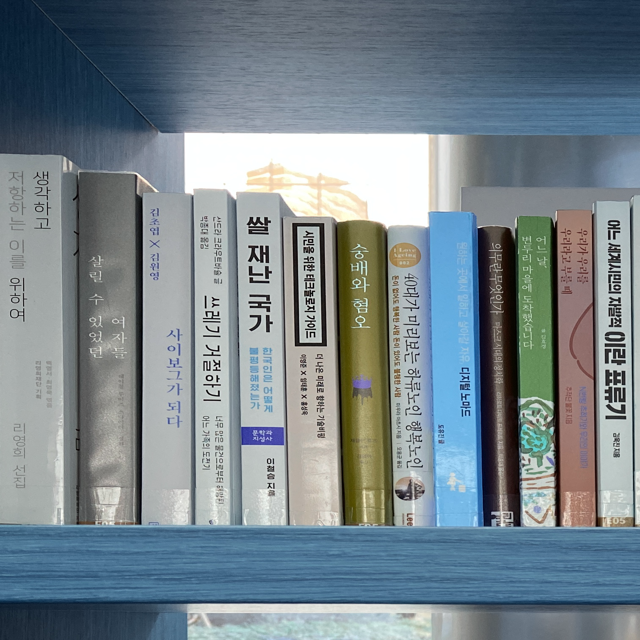

In [24]:
# 이미지 데이터 확인해보기

from google.colab.patches import cv2_imshow
img = cv2.cvtColor(cv2.imread(df.iloc[0,0]), cv2.COLOR_BGR2RGB)
print(img.shape)
cv2_imshow(img)

In [23]:
# label 데이터 확인해보기

label = pd.read_csv(df.iloc[0,0], encoding='utf-8')
label

UnicodeDecodeError: ignored

### Custom Dataset 클래스 만들기



In [27]:
class MyDataset(Dataset):
    def __init__(self, df):
        self.dataframe = df

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        image_path = self.dataframe.iloc[idx, 0]
        # label_path = self.datafrmae.iloc[idx, 0]

        image = np.asarray(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)).transpose(2,0,1)
        # label = 
        
        return image


In [30]:

if __name__ == '__main__':
    dataset = MyDataset(df)
    loader = DataLoader(dataset, batch_size=5, shuffle=True)

    for epochs in range(3):
        print('epochs :', epochs)
        for batch in loader:
            print(batch.shape)


epochs : 0
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
torch.Size([5, 3, 640, 640])
tor

### Cat and Dog Dataset 실습

In [7]:
def make_dataframe_catndog():    
    paths = []
    dataset_type = []
    label = []

    for dirname, _, filenames in os.walk('/content/drive/MyDrive/고모부_머신러닝/dogncat'):
        for filename in filenames:
            if '.jpg' in filename:
                file_path = dirname+'/'+filename
                paths.append(file_path)

            if '/training_set' in file_path:
                dataset_type.append('train')

            elif '/test_set' in file_path:
                dataset_type.append('test')

            else:
                dataset_type.append('N/A') 

            if 'dogs' in file_path:
                label.append('DOG')

            elif 'cats' in file_path:
                label.append('CAT')

            else:
                label.append('N/A')
        
    df = pd.DataFrame({'path' : file_path, 'dataset' : dataset_type, 'label' : label})
    return df

In [8]:
cnd_df = make_dataframe_catndog()
cnd_df.head()

,path,dataset,label
0,/content/drive/MyDrive/고모부_머신러닝/dognc...,test,CAT
1,/content/drive/MyDrive/고모부_머신러닝/dognc...,test,CAT
2,/content/drive/MyDrive/고모부_머신러닝/dognc...,test,CAT
3,/content/drive/MyDrive/고모부_머신러닝/dognc...,test,CAT
4,/content/drive/MyDrive/고모부_머신러닝/dognc...,test,CAT


In [9]:
class CndDataset(Dataset):
    def __init__(self, image_paths, labels):
        self.image_paths = image_paths
        self.labels = labels

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_file = self.image_paths[idx]

        if self.labels is not None:
            label = self.labels[idx]

        image = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)

        return image, label


In [11]:
train_df = cnd_df[cnd_df['dataset'] == 'train']
test_df = cnd_df[cnd_df['dataset'] == 'test']

train_img_path = train_df['path'].values
train_label = train_df['label'].values

test_img_path = test_df['path'].values
test_label_path = test_df['label'].values


In [18]:
cnd_dataset = CndDataset(train_img_path, train_label)
loader = DataLoader(cnd_dataset, batch_size=10, shuffle=True)

data, label = next(iter(loader))
print(data.shape)
print(label)

torch.Size([10, 230, 308, 3])
('DOG', 'CAT', 'DOG', 'DOG', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT')
